<a href="https://colab.research.google.com/github/Nirmala-debug/CN6005AI/blob/main/coursework_6005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.TIttle /**Metadata**
# Linear Regression Assignment - California Housing Dataset.
Student Name:Nirmala,suruchi.  
Course:Artifical intelligence CN 6005  
Date:2025/12/04


**Objective:** Perform EDA and Linear Regression on the California Housing dataset. Evaluate model performance (MAE, MSE, R²), visualize results, and compare Linear Regression with Ridge and Lasso.



Importing code cell


In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")
%matplotlib inline


3.Load dataset & create DataFrame (code cell + short text)
We load the California Housing dataset from sklearn. It contains ~20k rows and features like median income, rooms, population, etc. We'll create one categorical feature by binning median income.

In [ ]:
# Load dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame.copy()

# Clean column names (optional)
df.columns = df.columns.str.strip()

# Show shape and first rows
print("Shape:", df.shape)
df.head()


Shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


4. Create a categorical feature (satisfy mixed features requirement) (code cell)

We create 'income_cat' by binning median income into 4 categories; this gives us a categorical feature to analyze and use if desired.

In [ ]:
# 4. Create categorical feature by binning MedInc
df['income_cat'] = pd.cut(df['MedInc'],
                          bins=[0, 1.5, 3.0, 4.5, np.inf],
                          labels=['low', 'medium', 'high', 'very_high'])

df['income_cat'].value_counts()


,count
income_cat,
high,7236
medium,6581
very_high,6001
low,822


5. Exploratory Data Analysis (EDA) — summary statistics (code cell + text)

 we show summary statistics for numeric and categorical features, and note missing values, ranges, means, and sample counts.

In [ ]:
# 5. EDA - basic summary
print("Numeric summary:")
display(df.describe().T)

print("\nCategorical counts:")
display(df['income_cat'].value_counts())

print("\nMissing values per column:")
display(df.isnull().sum())


Numeric summary:


,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010



Categorical counts:


,count
income_cat,
high,7236
medium,6581
very_high,6001
low,822



Missing values per column:


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0
income_cat,0


Step 1: Histograms for all numeric features
### 4.1 Histograms for Numerical Features
We plot histograms to understand the distribution (shape, spread, skewness) of each numerical variable.


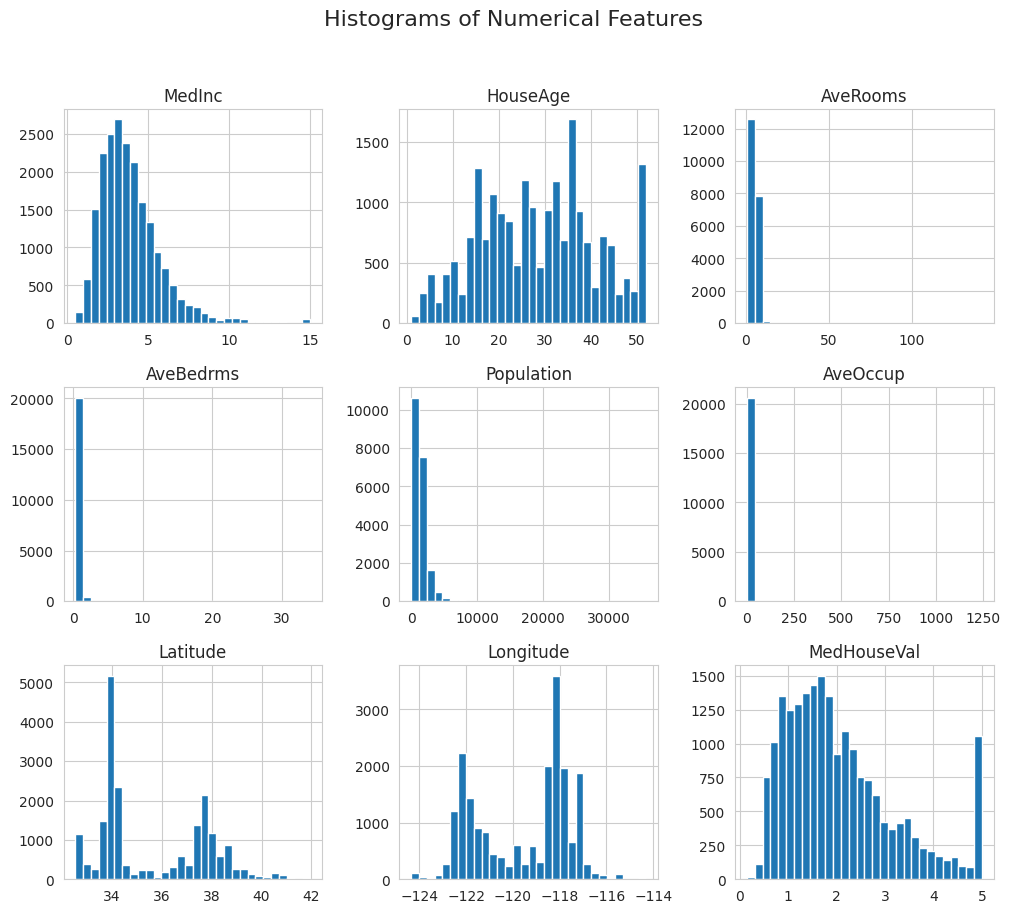

In [ ]:
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()


# 4.2 Box Plots for Outlier Detection

Box plots help identify potential outliers in each numerical feature.


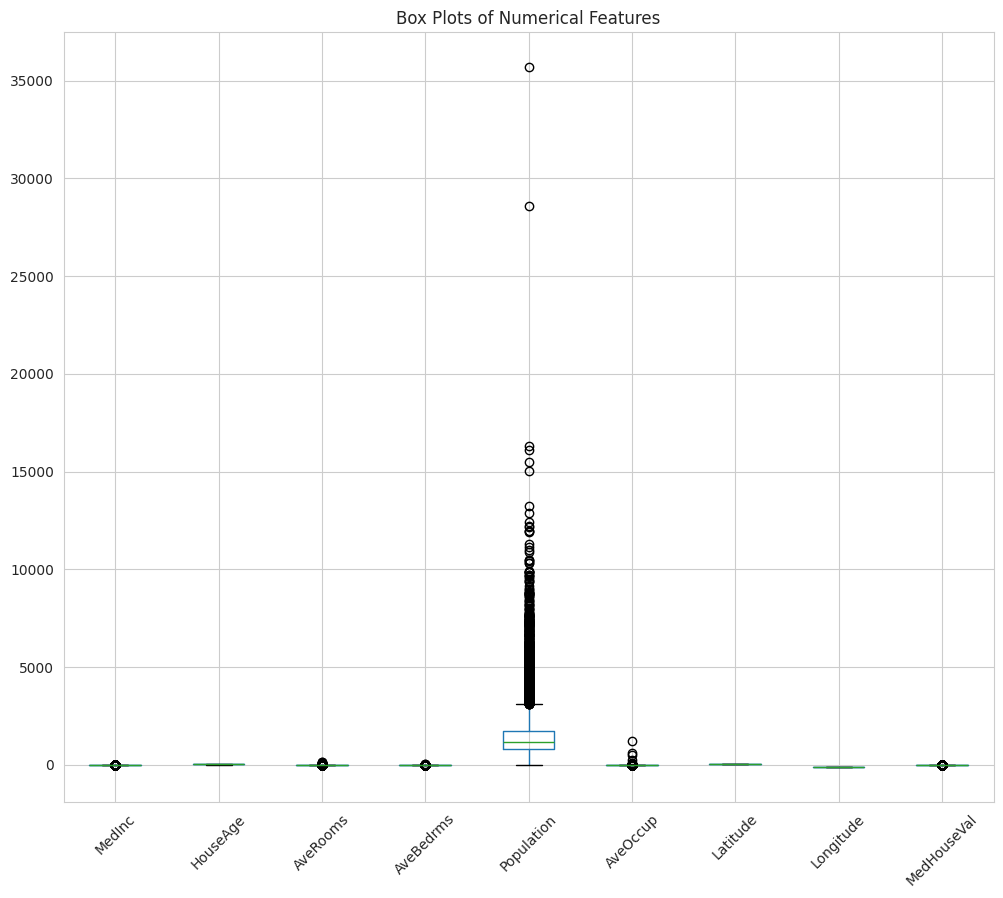

In [ ]:
plt.figure(figsize=(12, 10))
df.boxplot(rot=45)
plt.title("Box Plots of Numerical Features")
plt.show()


#4.3 Scatter Plots: Features vs Target

Scatter plots help identify linear or non-linear patterns between features and the target variable (`MedHouseVal`).


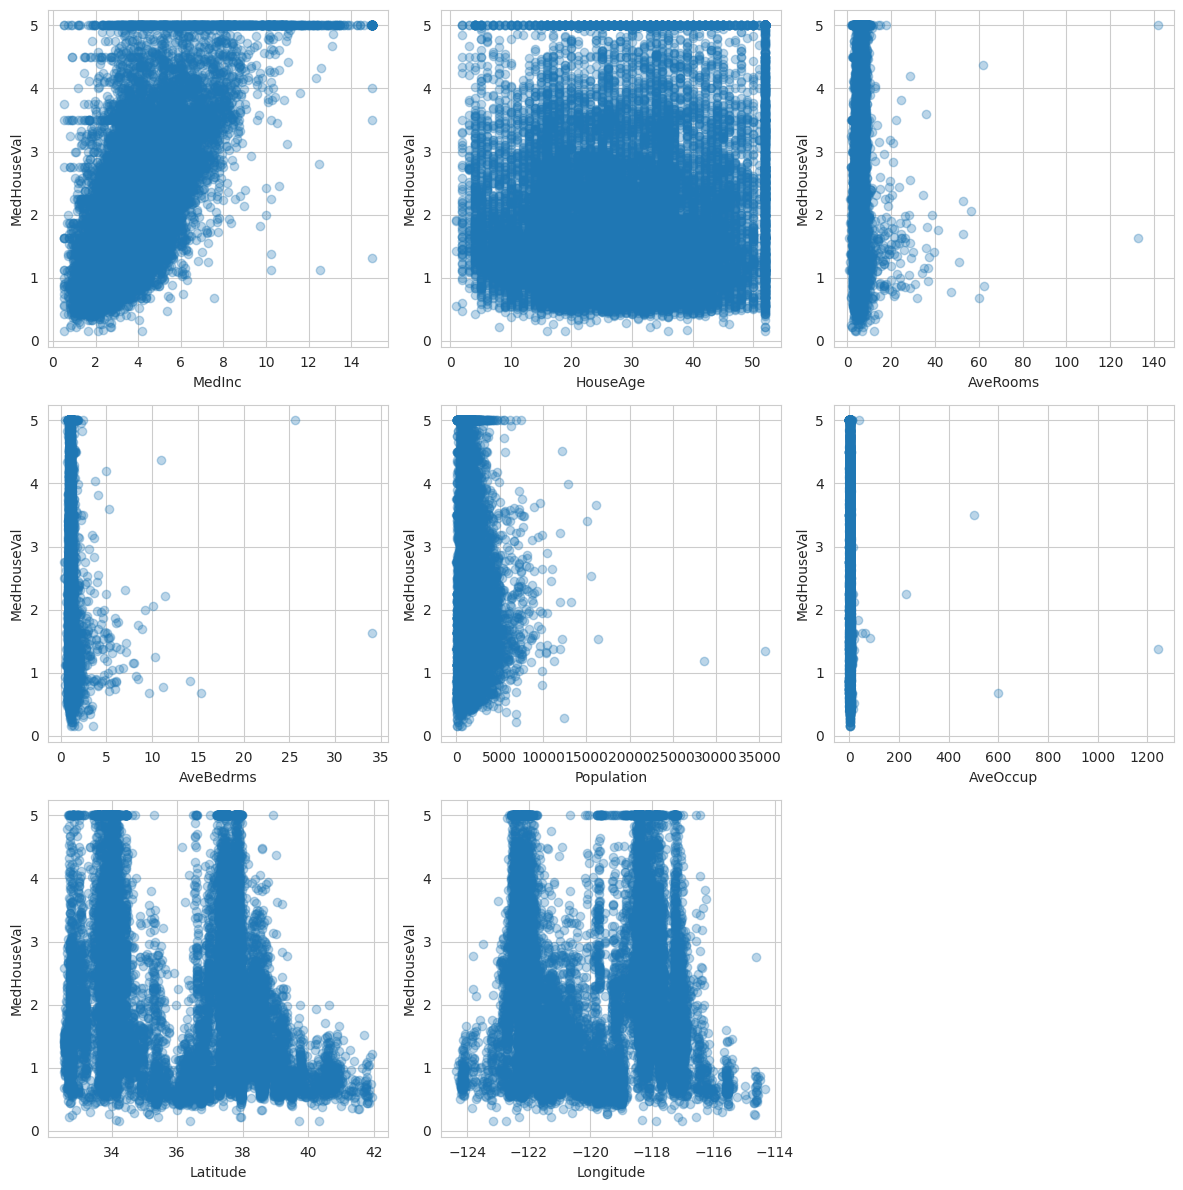

In [ ]:
features = df.columns.drop(['MedHouseVal', 'income_cat'])

plt.figure(figsize=(12, 12))
for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    plt.scatter(df[col], df['MedHouseVal'], alpha=0.3)
    plt.xlabel(col)
    plt.ylabel("MedHouseVal")
plt.tight_layout()
plt.show()


# 4.4 Correlation Heatmap

This heatmap shows correlation strength between features and the target.


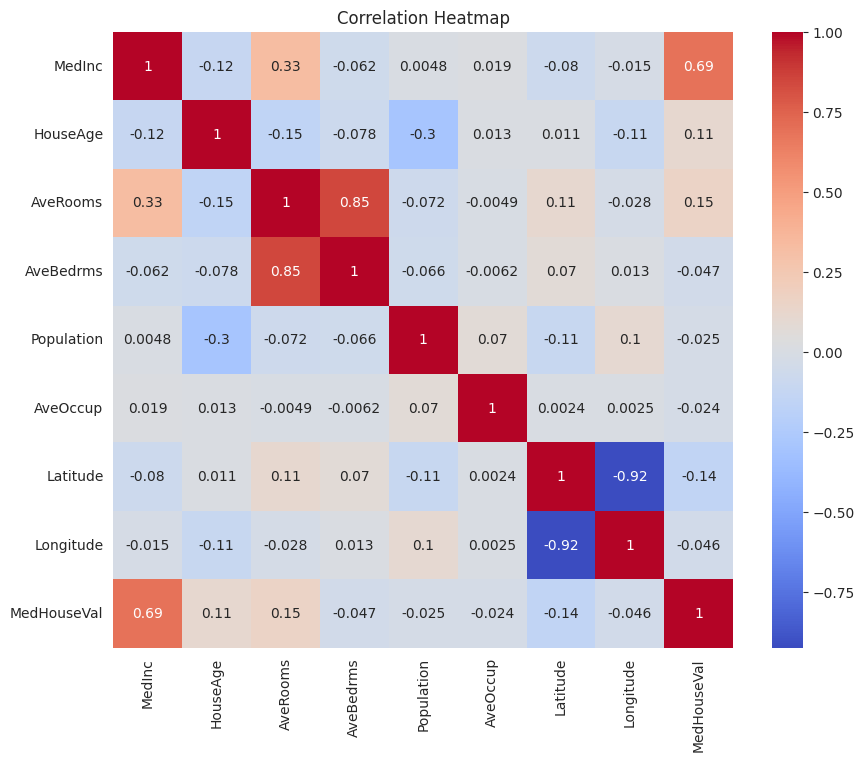

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## Prepare data (transform, split)


In [ ]:
# Features and target
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

# Identify numeric and categorical
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = ['income_cat']

# Column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
])

# Train-test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit transformer on training and transform
X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

# Feature names
cat_ohe_cols = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
feature_names = numeric_features + cat_ohe_cols

# Convert to DataFrame
X_train_df = pd.DataFrame(X_train, columns=feature_names, index=X_train_raw.index)
X_test_df = pd.DataFrame(X_test, columns=feature_names, index=X_test_raw.index)

X_train_df.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,income_cat_low,income_cat_medium,income_cat_very_high
14196,-0.326196,0.348490,-0.174916,-0.208365,0.768276,0.051376,-1.372811,1.272587,0.0,0.0,0.0
8267,-0.035843,1.618118,-0.402835,-0.128530,-0.098901,-0.117362,-0.876696,0.709162,0.0,0.0,0.0
17445,0.144701,-1.952710,0.088216,-0.257538,-0.449818,-0.032280,-0.460146,-0.447603,0.0,0.0,0.0
14265,-1.017864,0.586545,-0.600015,-0.145156,-0.007434,0.077507,-1.382172,1.232698,0.0,1.0,0.0
2271,-0.171488,1.142008,0.349007,0.086624,-0.485877,-0.068832,0.532084,-0.108551,0.0,0.0,0.0


## Linear Regression


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression — MAE: {mae_lr:.4f}, MSE: {mse_lr:.4f}, R²: {r2_lr:.4f}")


Linear Regression — MAE: 0.5335, MSE: 0.5546, R²: 0.5768


PRED vs ACT PLOT

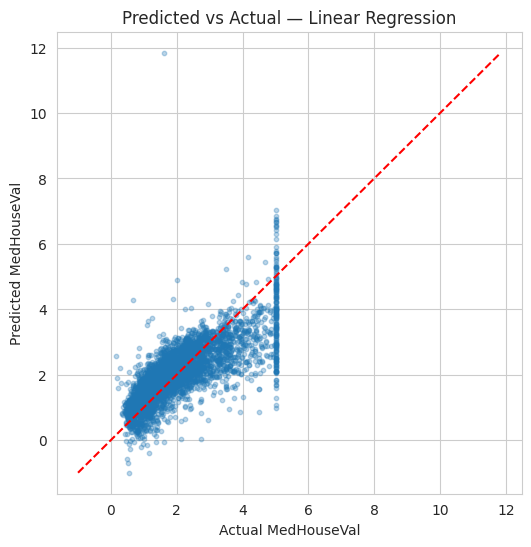

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.3, s=10)
max_val = max(y_test.max(), y_pred_lr.max())
min_val = min(y_test.min(), y_pred_lr.min())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.xlabel("Actual MedHouseVal")
plt.ylabel("Predicted MedHouseVal")
plt.title("Predicted vs Actual — Linear Regression")
plt.show()


RESIDUAL PLOT

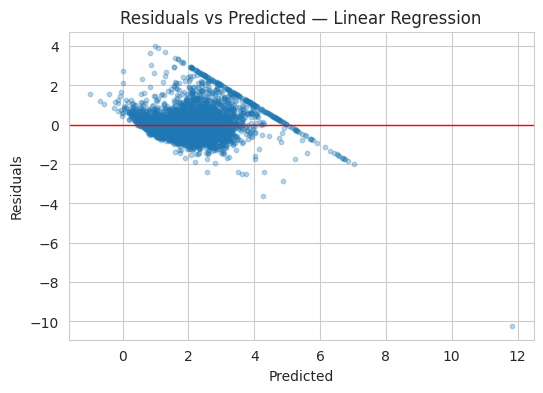

In [ ]:
residuals_lr = y_test - y_pred_lr
plt.figure(figsize=(6,4))
plt.scatter(y_pred_lr, residuals_lr, alpha=0.3, s=10)
plt.axhline(0, color='red', linewidth=1)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted — Linear Regression")
plt.show()


Ridge & Lasso

In [ ]:
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
lasso = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

def print_metrics(name, y_true, y_pred):
    print(f"{name} — MAE: {mean_absolute_error(y_true, y_pred):.4f}, "
          f"MSE: {mean_squared_error(y_true, y_pred):.4f}, "
          f"R²: {r2_score(y_true, y_pred):.4f}")

print_metrics("Linear Regression", y_test, y_pred_lr)
print_metrics("Ridge", y_test, y_pred_ridge)
print_metrics("Lasso", y_test, y_pred_lasso)


Linear Regression — MAE: 0.5335, MSE: 0.5546, R²: 0.5768
Ridge — MAE: 0.5335, MSE: 0.5545, R²: 0.5768
Lasso — MAE: 0.5353, MSE: 0.5470, R²: 0.5826


Linear Regression Training + Evaluation

In [ ]:
# STEP 16 — Train Linear Regression Model

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("R² :", r2_lr)


Linear Regression Performance:
MAE: 0.5334664248457017
MSE: 0.5545551012388992
R² : 0.5768076146858081


Residual Plot

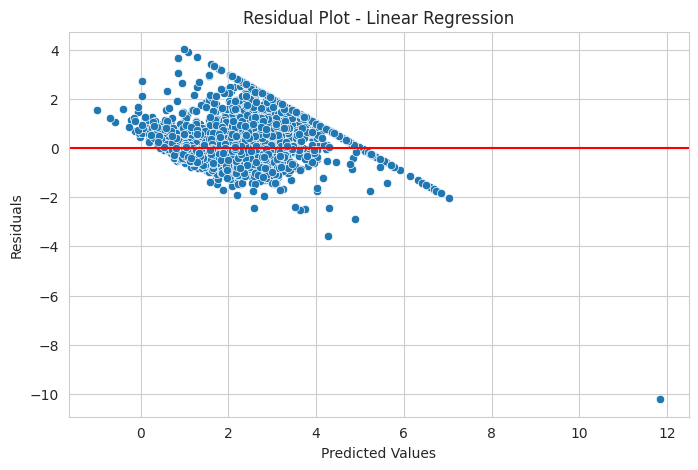

In [ ]:
# STEP 17 — Residual Plot

residuals = y_test - y_pred_lr

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_lr, y=residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot - Linear Regression")
plt.show()


Actual vs Predicted Plot

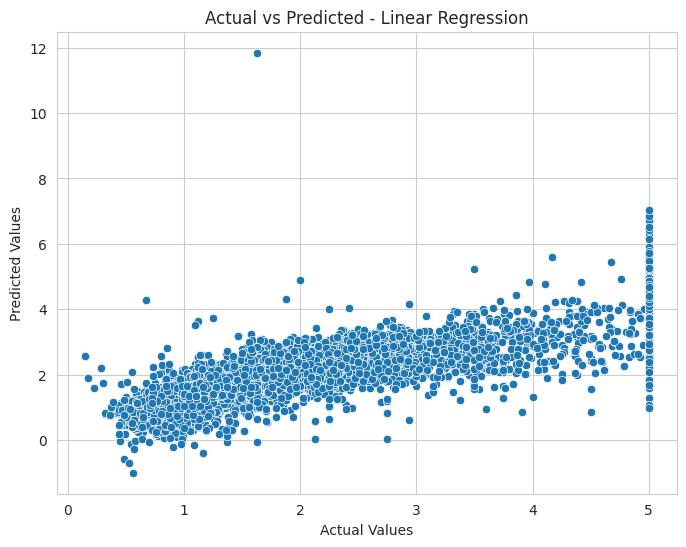

In [ ]:
# STEP 18 — Actual vs Predicted

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()


Ridge & Lasso Regression (Comparative Analysis)

In [ ]:
# STEP 19 — Ridge & Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

def print_metrics(name, y_true, y_pred):
    print(f"{name} → MAE: {mean_absolute_error(y_true, y_pred):.4f}, "
          f"MSE: {mean_squared_error(y_true, y_pred):.4f}, "
          f"R²: {r2_score(y_true, y_pred):.4f}")

print_metrics("Linear Regression", y_test, y_pred_lr)
print_metrics("Ridge", y_test, y_pred_ridge)
print_metrics("Lasso", y_test, y_pred_lasso)


Linear Regression → MAE: 0.5335, MSE: 0.5546, R²: 0.5768
Ridge → MAE: 0.5335, MSE: 0.5545, R²: 0.5768
Lasso → MAE: 0.5353, MSE: 0.5470, R²: 0.5826


# **Linear Regression Performance.**
MAE: 0.5335  
MSE: 0.5546  
R²: 0.5768
The model predicts the target reasonably well.

R² ~ 0.57 → ~57% of variance in house prices is explained by features

## **Ridge Regression**
MAE: 0.5335  
MSE: 0.5545  
R²: 0.5768
Almost identical performance to Linear Regression.

Regularization (Ridge) didn’t make much difference — maybe dataset has low multicollinearity.

# **Lasso Regression*
MAE: 0.5353  
MSE: 0.5470  
R²: 0.5826
Slightly higher MAE but slightly higher R².

Lasso may have shrunk some coefficients → small change in performance.



In this assignment, we compared the performance of Linear Regression, Ridge, and Lasso regression models on the California Housing dataset. Among the three models, Lasso achieved the highest R² value of 0.5826, indicating that it explains the variance in the target variable slightly better than the others. Linear Regression and Ridge showed almost identical performance, suggesting that regularization was not necessary for this dataset. One advantage of Lasso is its ability to perform feature selection by shrinking less important coefficients toward zero, although in this case, the effect was minimal. However, there are some limitations to consider. Linear models assume linear relationships between features and the target, which may not always hold true. Additionally, residual plots can reveal non-linear trends that the models fail to capture, and the presence of outliers can adversely affect prediction accuracy. Overall, while all three models performed reasonably well, Lasso provided a marginal improvement in explaining the variance of house prices.

